### K-means is Unsupervised learning model used for pattern recognition and association to its respective clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cust_Spend_Data.csv')

In [3]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
X_data=df.iloc[:,2:7]

In [5]:
X_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [6]:
X=df.iloc[:,3:7]

### Standardization

In [7]:
sc=StandardScaler()

In [8]:
sc_data=sc.fit_transform(df['Avg_Mthly_Spend'].values.reshape(-1,1))

In [9]:
sc_data=pd.DataFrame(sc_data,columns=['Avg_Mthly_Spend'])

In [10]:
sc_data.head(2)

,Avg_Mthly_Spend
0,1.886498
1,0.787567


In [11]:
New_data_frame=pd.concat([X, sc_data], axis=1)

### WSS Or Elbow curve

Text(0, 0.5, 'WSS')

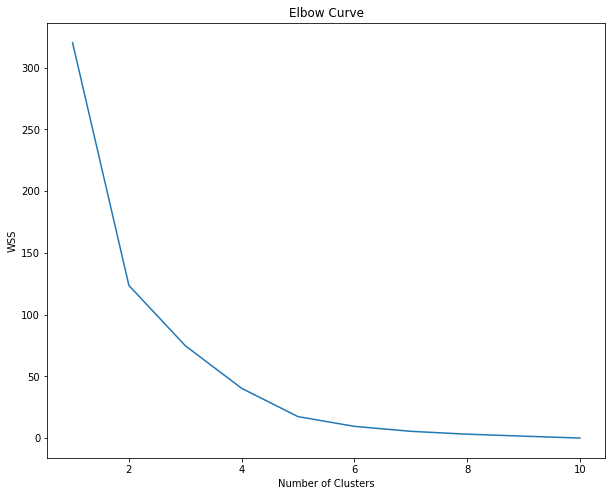

In [12]:
plt.figure(figsize=(10,8))
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(New_data_frame)
    wss.append(km.inertia_)
plt.plot(range(1,11),wss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

### K-Means Clustering

In [13]:
km=KMeans(n_clusters=2,init='k-means++',random_state=42)

In [14]:
km.fit(New_data_frame)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [15]:
km.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)>

In [16]:
km.inertia_

123.56138080861328

In [17]:
y_pred=km.predict(New_data_frame)

In [18]:
y_pred=pd.DataFrame(y_pred,columns=['Cluster'])

In [19]:
y_pred=y_pred+1

In [20]:
y_pred

,Cluster
0,2
1,1
2,2
3,2
4,1
5,2
6,1
7,2
8,2
9,2


### Concat Dataset

In [21]:
Class_of_data=pd.concat([X_data,y_pred],axis=1)

In [22]:
sorted_data=Class_of_data.sort_values('Cluster')

In [23]:
sorted_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
1,7000,3,0,10,9,1
4,6000,6,0,12,3,1
6,2500,5,0,11,2,1
0,10000,2,1,1,0,2
2,7000,7,1,3,4,2
3,6500,5,1,1,4,2
5,4000,3,0,1,8,2
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [24]:
round(sorted_data.groupby(by='Cluster').mean(),2)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Cluster,,,,,
1,5166.67,4.67,0.00,11.00,4.67
2,4714.29,3.71,0.43,1.43,3.71


In [25]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(New_data_frame, km.labels_))

0.5148917477149177
